# Generate pre-cropped ATM22 for faster training 切片

In [1]:
import os
import numpy as np
import skimage.io as io
import SimpleITK as sitk
import torch
import matplotlib.pyplot as plt

/home/wangc/anaconda3/envs/test1/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 将文件重命名并移动到另一个文件夹

# 指定原始文件夹路径和目标文件夹路径
original_folder = "/mnt/wangc/LIDC/image2/"
destination_folder = "/mnt/wangc/LIDC/image4/"

# 获取原始文件夹下所有文件
files = os.listdir(original_folder)

# 循环处理每个文件
for filename in files:
    # 构造完整的原始文件路径
    original_full_path = os.path.join(original_folder, filename)
    
    # 获取文件名部分（不包含路径）
    file_name = os.path.basename(original_full_path)
    
    # 构造新的文件名，去掉多余的路径信息
    new_filename = 'LIDC_IDRI_'+file_name
    
    # 构造新的完整文件路径（在目标文件夹下）
    destination_full_path = os.path.join(destination_folder, new_filename)
    
    # 重命名文件并移动到目标文件夹
    os.rename(original_full_path, destination_full_path)
    print(f"移动文件: {filename} -> {destination_full_path}")


移动文件: 0066.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0066.nii.gz
移动文件: 0140.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0140.nii.gz
移动文件: 0328.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0328.nii.gz
移动文件: 0376.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0376.nii.gz
移动文件: 0403.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0403.nii.gz
移动文件: 0430.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0430.nii.gz
移动文件: 0438.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0438.nii.gz
移动文件: 0441.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0441.nii.gz
移动文件: 0490.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0490.nii.gz
移动文件: 0529.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0529.nii.gz
移动文件: 0606.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0606.nii.gz
移动文件: 0621.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0621.nii.gz
移动文件: 0648.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0648.nii.gz
移动文件: 0651.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0651.nii.gz
移动文件: 0657.nii.gz -> /mnt/wangc/LIDC/image4/LIDC_IDRI_0657.nii.gz
移动文件: 0663

In [1]:


# build the raw_data_dict for train

raw_data_dict = dict()



case_names = []


raw_data_dict = dict()

ATM22_file_path = "/mnt/share102/et22-liy/ATM22_data"
ATM22_train_raw_path = ATM22_file_path+"/train"
ATM22_train_label_path = ATM22_file_path+"/train_label"

ATM22_raw_names = os.listdir(ATM22_train_raw_path)
ATM22_raw_names.sort()

ATM22_label_names = os.listdir(ATM22_train_label_path)
ATM22_label_names.sort()

case_names = []

for case in ATM22_raw_names:
    temp = case.split(".")[0]
    case_names.append(temp)
    raw_data_dict["ATM22_"+temp]={}
    raw_data_dict["ATM22_"+temp]["image"]=ATM22_train_raw_path+"/"+case

for case in ATM22_label_names:
    temp = case[:7]
    print(temp)
    if temp in case_names:
        raw_data_dict["ATM22_"+temp]["label"]=ATM22_train_label_path+"/"+case

ATM22_data_dict = raw_data_dict

/home/cs22-wangc/anaconda3/envs/test2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ATM_001
ATM_002
ATM_003
ATM_004
ATM_005
ATM_006
ATM_007
ATM_008
ATM_009
ATM_010
ATM_011
ATM_012
ATM_013
ATM_014
ATM_015
ATM_016
ATM_017
ATM_018
ATM_019
ATM_020
ATM_021
ATM_022
ATM_023
ATM_024
ATM_025
ATM_026
ATM_027
ATM_028
ATM_029
ATM_030
ATM_031
ATM_032
ATM_033
ATM_034
ATM_036
ATM_037
ATM_038
ATM_039
ATM_040
ATM_041
ATM_042
ATM_043
ATM_044
ATM_045
ATM_046
ATM_047
ATM_048
ATM_049
ATM_050
ATM_051
ATM_052
ATM_053
ATM_054
ATM_055
ATM_056
ATM_057
ATM_058
ATM_059
ATM_060
ATM_061
ATM_062
ATM_063
ATM_064
ATM_065
ATM_066
ATM_067
ATM_068
ATM_069
ATM_070
ATM_071
ATM_072
ATM_073
ATM_074
ATM_075
ATM_076
ATM_077
ATM_078
ATM_079
ATM_080
ATM_081
ATM_082
ATM_083
ATM_084
ATM_085
ATM_086
ATM_087
ATM_088
ATM_089
ATM_090
ATM_091
ATM_092
ATM_093
ATM_094
ATM_095
ATM_096
ATM_097
ATM_098
ATM_099
ATM_100
ATM_108
ATM_112
ATM_116
ATM_118
ATM_119
ATM_120
ATM_121
ATM_122
ATM_123
ATM_124
ATM_125
ATM_126
ATM_127
ATM_128
ATM_129
ATM_130
ATM_131
ATM_135
ATM_136
ATM_137
ATM_138
ATM_139
ATM_140
ATM_145
ATM_146
ATM_147


In [1]:
raw_data_dict('ATM22_ATM_001')

NameError: name 'raw_data_dict' is not defined

In [2]:
#当我们需要对一个3D图像进行处理时，可能需要将其分成多个小块，以便于对每个小块进行处理，比如使用卷积神经网络进行分类或分割等任务。
# 这时，我们需要一个函数来将3D图像分成多个小块，这个函数就是crop_one_3d_img。
def crop_one_3d_img(input_img, crop_cube_size, stride):
    # input_img: 3d matrix, numpy.array
    # input_img：输入的3D图像，为numpy.array类型。
    # crop_cube_size：可以是一个int类型的值，也可以是一个长度为3的tuple类型的值，表示裁剪出来的小方块在3个方向上的大小
    # stride：stride也可以是一个int类型的值，也可以是一个长度为3的tuple类型的值，表示在3个方向上移动的步长
    assert isinstance(crop_cube_size, (int, tuple))
    if isinstance(crop_cube_size, int):
        crop_cube_size=np.array([crop_cube_size, crop_cube_size, crop_cube_size])
    else:
        assert len(crop_cube_size)==3#如果 crop_cube_size 是一个三元组，则检查其长度是否为 3
    
    #不能超过input_img的shape
    crop_cube_size = (min(crop_cube_size[0], input_img.shape[0]),
                      min(crop_cube_size[1], input_img.shape[1]),
                      min(crop_cube_size[2], input_img.shape[2]))
    
    #检查 stride 是否为整数或 3 元组，类似于 crop_cube_size。如果它是一个整数，则将其转换为一个大小为 3 的 numpy 数组
    assert isinstance(stride, (int, tuple))
    if isinstance(stride, int):
        stride=np.array([stride, stride, stride])
    else:
        assert len(stride)==3

    #获取输入图像的形状并计算需要切割的总次数
    img_shape=input_img.shape
    
    total=len(np.arange(0, img_shape[0], stride[0]))*len(np.arange(0, img_shape[1], stride[1]))*len(np.arange(0, img_shape[2], stride[2]))
    
    count=0
    
    crop_list = []
    #现在，我们将开始对输入图像进行切割。
    # 通过使用三个 for 循环，我们遍历整个输入图像，每个循环中获取一个立方体。
    # 在每个迭代中，我们还检查当前位置是否可行，并相应地调整 x、y 和 z 的开始和结束索引。
    for i in np.arange(0, img_shape[0], stride[0]):
        for j in np.arange(0, img_shape[1], stride[1]):
            for k in np.arange(0, img_shape[2], stride[2]):
                # 接下来的代码是对于每个 i, j, k 的组合，判断裁剪的范围是否超出了原始图像的边界。
                # 如果没有超出边界，就根据裁剪范围和步长计算出在裁剪后的图像中的范围；如果超出了边界，则在原始图像的边界处进行裁剪。
                print('crop one 3d img progress : '+str(int(count/total*100))+'%', end='\r')
                if i+crop_cube_size[0]<=img_shape[0]:
                    x_start_input=i
                    x_end_input=i+crop_cube_size[0]
                    x_start_output=i#只使用了x_start_input没有用x_start_output
                    x_end_output=i+stride[0]#同
                else:
                    x_start_input=img_shape[0]-crop_cube_size[0]
                    x_end_input=img_shape[0]
                    x_start_output=i
                    x_end_output=img_shape[0]

                #这部分代码的作用是计算y轴方向上需要裁剪的区域的起始和结束位置。
                # 如果当前位置j+crop_cube_size[1]小于等于img_shape[1]，说明可以完整地取出crop_cube_size[1]大小的区域，
                # 因此y_start_input从j开始，y_end_input从j+crop_cube_size[1]开始，y_start_output和y_end_output也相同。
                if j+crop_cube_size[1]<=img_shape[1]:
                    y_start_input=j
                    y_end_input=j+crop_cube_size[1]
                    y_start_output=j
                    y_end_output=j+stride[1]
                else:
                # 如果当前位置j+crop_cube_size[1]大于img_shape[1]，说明无法完整地取出crop_cube_size[1]大小的区域
                # 因此y_start_input为img_shape[1]-crop_cube_size[1]，y_end_input为img_shape[1]，
                # 表示从img_shape[1]-crop_cube_size[1]位置开始取到img_shape[1]位置，
                # 此时y_start_output为j，表示当前位置j之前的部分已经被裁剪过了，
                # y_end_output为img_shape[1]，表示当前位置j到img_shape[1]位置之间的部分会被裁剪。
                    y_start_input=img_shape[1]-crop_cube_size[1]
                    y_end_input=img_shape[1]
                    y_start_output=j
                    y_end_output=img_shape[1]
                
                if k+crop_cube_size[2]<=img_shape[2]:
                    z_start_input=k
                    z_end_input=k+crop_cube_size[2]
                    z_start_output=k
                    z_end_output=k+stride[2]
                else:
                    z_start_input=img_shape[2]-crop_cube_size[2]
                    z_end_input=img_shape[2]
                    z_start_output=k
                    z_end_output=img_shape[2]
                #最后，我们将裁剪后的图像添加到 crop_list 中，并递增计数器 count。循环结束后，我们将 crop_list 返回。
                crop_temp=input_img[x_start_input:x_end_input, y_start_input:y_end_input, z_start_input:z_end_input]
                crop_list.append(np.array(crop_temp, dtype=float))
                
                count=count+1
                
    return crop_list

In [21]:


for i, case in enumerate(raw_data_dict.keys()):
    print(raw_data_dict[case]["image"])
    raw_img = io.imread(raw_data_dict[case]["image"], plugin='simpleitk')
    label_img = io.imread(raw_data_dict[case]["label"], plugin='simpleitk')
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    img_input = torch.from_numpy(raw_img.astype(np.float32)).to(device)
    groundtruth_foreground = torch.from_numpy(label_img.astype(np.float32)).to(device)
    groundtruth_background = 1 - groundtruth_foreground

    fore_pix_num = torch.sum(groundtruth_foreground)
    back_pix_num = torch.sum(groundtruth_background)
    # fore_pix_per = fore_pix_num / (fore_pix_num + back_pix_num)
    # back_pix_per = back_pix_num / (fore_pix_num + back_pix_num)
    print(fore_pix_num, back_pix_num )
    print(raw_img.shape,label_img.shape)
    break


/mnt/share102/et22-liy/ATM22_data/train/ATM_001.nii.gz
tensor(152573., device='cuda:0') tensor(1.7784e+08, device='cuda:0')
(679, 512, 512) (679, 512, 512)


TypeError: Invalid shape (679, 512, 512) for image data

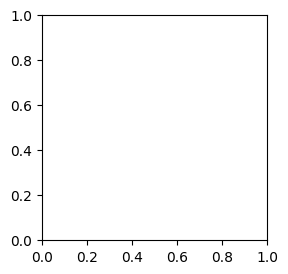

In [20]:
for i, case in enumerate(raw_data_dict.keys()):
    raw_img = sitk.ReadImage(raw_data_dict[case]["image"])
    raw_array = sitk.GetArrayViewFromImage(raw_img)

    label_img = sitk.ReadImage(raw_data_dict[case]["label"])
    label_array = sitk.GetArrayViewFromImage(label_img)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(raw_array, cmap='gray')
    plt.title("Raw Image")

    plt.subplot(1, 2, 2)
    plt.imshow(label_array, cmap='gray')
    plt.title("Label Image")

    plt.show()
    break


In [8]:
crop_cube_size=(128,128,128)
stride=(64,64,64)

# -----INPUT-----
output_file_path = "Precrop_dataset_for_ATM221"#在这个文件夹下

if not os.path.exists(output_file_path+"/image/"):
    os.makedirs(output_file_path+"/image/")

if not os.path.exists(output_file_path+"/label/"):
    os.makedirs(output_file_path+"/label/")

raw_data_dict = ATM22_data_dict
# -----END-----

for i, case in enumerate(raw_data_dict.keys()):
    if i>=10:
        break
    raw_img = io.imread(raw_data_dict[case]["image"], plugin='simpleitk')
    label_img = io.imread(raw_data_dict[case]["label"], plugin='simpleitk')
    
    raw_img_crop_list = crop_one_3d_img(raw_img, crop_cube_size=crop_cube_size, stride=stride)#用上面那个函数裁剪
    label_img_crop_list = crop_one_3d_img(label_img, crop_cube_size=crop_cube_size, stride=stride)
    
    assert len(raw_img_crop_list)==len(label_img_crop_list)
    
    for idx in range(len(raw_img_crop_list)):
        print("progress: "+str(idx)+"th crop | "+str(i)+"th 3d img: "+str(case), end="\r")
        
        #sitk.WriteImage(sitk.GetImageFromArray(raw_img_crop_list[idx]), output_file_path+"/image/"+case+"_"+str(idx)+".nii.gz")
        #sitk.WriteImage(sitk.GetImageFromArray(label_img_crop_list[idx]), output_file_path+"/label/"+case+"_"+str(idx)+".nii.gz")
        
        np.save(output_file_path+"/image/"+case+"_"+str(idx)+".npy", raw_img_crop_list[idx])#保存
        np.save(output_file_path+"/label/"+case+"_"+str(idx)+".npy", label_img_crop_list[idx])

In [2]:
def crop_one_3d_img_a(input_img,label_img, crop_cube_size, device,stride):
    # input_img: 3d matrix, numpy.array
    # input_img：输入的3D图像，为numpy.array类型。
    # crop_cube_size：可以是一个int类型的值，也可以是一个长度为3的tuple类型的值，表示裁剪出来的小方块在3个方向上的大小
    # stride：stride也可以是一个int类型的值，也可以是一个长度为3的tuple类型的值，表示在3个方向上移动的步长
    assert isinstance(crop_cube_size, (int, tuple))
    if isinstance(crop_cube_size, int):
        crop_cube_size=np.array([crop_cube_size, crop_cube_size, crop_cube_size])
    else:
        assert len(crop_cube_size)==3#如果 crop_cube_size 是一个三元组，则检查其长度是否为 3
    # print('img_shape',input_img.shape)
    #不能超过input_img的shape
    crop_cube_size = (min(crop_cube_size[0], input_img.shape[0]),
                      min(crop_cube_size[1], input_img.shape[1]),
                      min(crop_cube_size[2], input_img.shape[2]))

    # print('crop_cube_size',crop_cube_size)


    #检查 stride 是否为整数或 3 元组，类似于 crop_cube_size。如果它是一个整数，则将其转换为一个大小为 3 的 numpy 数组
    assert isinstance(stride, (int, tuple))
    if isinstance(stride, int):
        stride=np.array([stride, stride, stride])
    else:
        assert len(stride)==3

    #获取输入图像的形状并计算需要切割的总次数
    img_shape=input_img.shape
    label_shape=label_img.shape
    total=len(np.arange(0, img_shape[0], stride[0]))*len(np.arange(0, img_shape[1], stride[1]))*len(np.arange(0, img_shape[2], stride[2]))
    count=0
    useful=0
    crop_img_list = []
    crop_label_list = []
    # #现在，我们将开始对输入图像进行切割。
    # # 通过使用三个 for 循环，我们遍历整个输入图像，每个循环中获取一个立方体。
    # # 在每个迭代中，我们还检查当前位置是否可行，并相应地调整 x、y 和 z 的开始和结束索引。
    for i in np.arange(0, img_shape[0], stride[0]):
        for j in np.arange(0, img_shape[1], stride[1]):
            for k in np.arange(0, img_shape[2], stride[2]):
                # 接下来的代码是对于每个 i, j, k 的组合，判断裁剪的范围是否超出了原始图像的边界。
                # 如果没有超出边界，就根据裁剪范围和步长计算出在裁剪后的图像中的范围；如果超出了边界，则在原始图像的边界处进行裁剪。
                
                print('crop one 3d img progress : '+str(int(count/total*100))+'%', end='\r')
                if i+crop_cube_size[0]<=img_shape[0]:
                    x_start_input=i
                    x_end_input=i+crop_cube_size[0]
                    x_start_output=i#只使用了x_start_input没有用x_start_output
                    x_end_output=i+stride[0]#同
                else:
                    x_start_input=img_shape[0]-crop_cube_size[0]
                    x_end_input=img_shape[0]
                    x_start_output=i
                    x_end_output=img_shape[0]

                #这部分代码的作用是计算y轴方向上需要裁剪的区域的起始和结束位置。
                # 如果当前位置j+crop_cube_size[1]小于等于img_shape[1]，说明可以完整地取出crop_cube_size[1]大小的区域，
                # 因此y_start_input从j开始，y_end_input从j+crop_cube_size[1]开始，y_start_output和y_end_output也相同。
                if j+crop_cube_size[1]<=img_shape[1]:
                    y_start_input=j
                    y_end_input=j+crop_cube_size[1]
                    y_start_output=j
                    y_end_output=j+stride[1]
                else:
                # 如果当前位置j+crop_cube_size[1]大于img_shape[1]，说明无法完整地取出crop_cube_size[1]大小的区域
                # 因此y_start_input为img_shape[1]-crop_cube_size[1]，y_end_input为img_shape[1]，
                # 表示从img_shape[1]-crop_cube_size[1]位置开始取到img_shape[1]位置，
                # 此时y_start_output为j，表示当前位置j之前的部分已经被裁剪过了，
                # y_end_output为img_shape[1]，表示当前位置j到img_shape[1]位置之间的部分会被裁剪。
                    y_start_input=img_shape[1]-crop_cube_size[1]
                    y_end_input=img_shape[1]
                    y_start_output=j
                    y_end_output=img_shape[1]
                
                if k+crop_cube_size[2]<=img_shape[2]:
                    z_start_input=k
                    z_end_input=k+crop_cube_size[2]
                    z_start_output=k
                    z_end_output=k+stride[2]
                else:
                    z_start_input=img_shape[2]-crop_cube_size[2]
                    z_end_input=img_shape[2]
                    z_start_output=k
                    z_end_output=img_shape[2]
                #最后，我们将裁剪后的图像添加到 crop_list 中，并递增计数器 count。循环结束后，我们将 crop_list 返回。
                crop_img_temp=input_img[x_start_input:x_end_input, y_start_input:y_end_input, z_start_input:z_end_input]
                crop_label_temp=label_img[x_start_input:x_end_input, y_start_input:y_end_input, z_start_input:z_end_input]
                crop_label_fore=torch.from_numpy(crop_label_temp.astype(np.float32)).to(device)
                groundtruth_foreground=crop_label_fore.float().to(device)
                groundtruth_background=1-groundtruth_foreground

                #代码根据标签数据计算前景像素和背景像素的数量，
                # 然后计算前景像素和背景像素在整个图像中的比例（fore_pix_per和back_pix_per）。
                fore_pix_num = torch.sum(groundtruth_foreground)
                back_pix_num = torch.sum(groundtruth_background)
                fore_pix_per = fore_pix_num/(fore_pix_num+back_pix_num)
                back_pix_per = back_pix_num/(fore_pix_num+back_pix_num)
                # print(fore_pix_per,back_pix_per)
                if back_pix_per*100 > 99.999:
                    print(0)
                else:
                    crop_img_list.append(np.array(crop_img_temp, dtype=float))
                    crop_label_list.append(np.array(crop_label_temp, dtype=float))
                    useful=useful+1
                count=count+1
    print('useful',useful)            
    return crop_img_list,crop_label_list

In [47]:
crop_cube_size=(128,128,128)
stride=(64,64,64)

# crop_cube_size=(256,256,256)
# stride=(128,128,128)

# -----INPUT-----
output_file_path = "Precrop_dataset_for_ATM33"#在这个文件夹下

if not os.path.exists(output_file_path+"/image/"):
    os.makedirs(output_file_path+"/image/")

if not os.path.exists(output_file_path+"/label/"):
    os.makedirs(output_file_path+"/label/")

raw_data_dict = ATM22_data_dict
# -----END-----

for i, case in enumerate(raw_data_dict.keys()):
    if i<10:
        continue
    raw_img = io.imread(raw_data_dict[case]["image"], plugin='simpleitk')
    label_img = io.imread(raw_data_dict[case]["label"], plugin='simpleitk')
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    raw_img_crop_list,label_img_crop_list = crop_one_3d_img_a(raw_img,label_img, crop_cube_size=crop_cube_size, device=device, stride=stride)#用上面那个函数裁剪
    
    assert len(raw_img_crop_list)==len(label_img_crop_list)
    
    for idx in range(len(raw_img_crop_list)):
        print("progress: "+str(idx)+"th crop | "+str(i)+"th 3d img: "+str(case), end="\r")
        
        # #sitk.WriteImage(sitk.GetImageFromArray(raw_img_crop_list[idx]), output_file_path+"/image/"+case+"_"+str(idx)+".nii.gz")
        # #sitk.WriteImage(sitk.GetImageFromArray(label_img_crop_list[idx]), output_file_path+"/label/"+case+"_"+str(idx)+".nii.gz")
        
        np.save(output_file_path+"/image/"+case+"_"+str(idx)+".npy", raw_img_crop_list[idx])#保存
        np.save(output_file_path+"/label/"+case+"_"+str(idx)+".npy", label_img_crop_list[idx])

0    crop one 3d img progress : 0%
0    crop one 3d img progress : 0%
0    crop one 3d img progress : 0%
0    crop one 3d img progress : 0%
0    crop one 3d img progress : 0%
0    crop one 3d img progress : 0%
0    crop one 3d img progress : 0%
0    crop one 3d img progress : 0%
0    crop one 3d img progress : 1%
0    crop one 3d img progress : 1%
0    crop one 3d img progress : 1%
0    crop one 3d img progress : 1%
0    crop one 3d img progress : 1%
0    crop one 3d img progress : 1%
0    crop one 3d img progress : 1%
0    crop one 3d img progress : 2%
0    crop one 3d img progress : 2%
0    crop one 3d img progress : 2%
0    crop one 3d img progress : 2%
0    crop one 3d img progress : 2%
0    crop one 3d img progress : 2%
0    crop one 3d img progress : 2%
0    crop one 3d img progress : 3%
0    crop one 3d img progress : 3%
0    crop one 3d img progress : 3%
0    crop one 3d img progress : 3%
0    crop one 3d img progress : 3%
0    crop one 3d img progress : 3%
0    crop one 3d img

KeyboardInterrupt: 

# Generate pre-cropped EXACT09 and LIDC-IDRI for faster training 切片

In [9]:
import os
import numpy as np
import skimage.io as ioc  
import SimpleITK as sitk


# build the raw_data_dict for train

raw_data_dict = dict()

LIDC_IDRI_file_path = "/mnt/wangc/LIDC"
LIDC_IDRI_raw_path = LIDC_IDRI_file_path+"/image"
LIDC_IDRI_label_path = LIDC_IDRI_file_path+"/label"

LIDC_IDRI_raw_names = os.listdir(LIDC_IDRI_raw_path)
LIDC_IDRI_raw_names.sort()

LIDC_IDRI_label_names = os.listdir(LIDC_IDRI_label_path)
LIDC_IDRI_label_names.sort()

case_names = []

for case in LIDC_IDRI_raw_names:
    temp = case.split(".")[0]
    #print(temp)
    case_names.append(temp)
    raw_data_dict["LIDC_IDRI_"+temp]={}
    raw_data_dict["LIDC_IDRI_"+temp]["image"]=LIDC_IDRI_raw_path+"/"+case

for case in LIDC_IDRI_label_names:
    temp = case.split(".")[0]
    temp=temp[:-6]
    # print(temp)
    if temp in case_names:
        raw_data_dict["LIDC_IDRI_"+temp]["label"]=LIDC_IDRI_label_path+"/"+case

LIDC_IDRI_data_dict = raw_data_dict





# # # EXACT09 train data

# raw_data_dict = dict()

# EXACT09_file_path = "/mnt/wangc/EXACT09/EXACT09_3D"
# EXACT09_train_raw_path = EXACT09_file_path+"/train"
# EXACT09_train_label_path = EXACT09_file_path+"/train_label"

# EXACT09_raw_names = os.listdir(EXACT09_train_raw_path)
# EXACT09_raw_names.sort()

# EXACT09_label_names = os.listdir(EXACT09_train_label_path)
# EXACT09_label_names.sort()

# case_names = []

# for case in EXACT09_raw_names:
#     temp = case.split(".")[0]
#     case_names.append(temp)
#     raw_data_dict["EXACT09_"+temp]={}
#     raw_data_dict["EXACT09_"+temp]["image"]=EXACT09_train_raw_path+"/"+case

# for case in EXACT09_label_names:
#     temp = case.split("_")[0]
#     if temp in case_names:
#         raw_data_dict["EXACT09_"+temp]["label"]=EXACT09_train_label_path+"/"+case

# EXACT09_data_dict = raw_data_dict

In [8]:
print(LIDC_IDRI_data_dict)
# print(EXACT09_data_dict)

{'LIDC_IDRI_LIDC_IDRI_0066': {'image': '/mnt/wangc/LIDC/image/LIDC_IDRI_0066.nii.gz', 'label': '/mnt/wangc/LIDC/label/LIDC_IDRI_0066_label.nii.gz'}, 'LIDC_IDRI_LIDC_IDRI_0140': {'image': '/mnt/wangc/LIDC/image/LIDC_IDRI_0140.nii.gz', 'label': '/mnt/wangc/LIDC/label/LIDC_IDRI_0140_label.nii.gz'}, 'LIDC_IDRI_LIDC_IDRI_0328': {'image': '/mnt/wangc/LIDC/image/LIDC_IDRI_0328.nii.gz', 'label': '/mnt/wangc/LIDC/label/LIDC_IDRI_0328_label.nii.gz'}, 'LIDC_IDRI_LIDC_IDRI_0376': {'image': '/mnt/wangc/LIDC/image/LIDC_IDRI_0376.nii.gz', 'label': '/mnt/wangc/LIDC/label/LIDC_IDRI_0376_label.nii.gz'}, 'LIDC_IDRI_LIDC_IDRI_0403': {'image': '/mnt/wangc/LIDC/image/LIDC_IDRI_0403.nii.gz', 'label': '/mnt/wangc/LIDC/label/LIDC_IDRI_0403_label.nii.gz'}, 'LIDC_IDRI_LIDC_IDRI_0430': {'image': '/mnt/wangc/LIDC/image/LIDC_IDRI_0430.nii.gz', 'label': '/mnt/wangc/LIDC/label/LIDC_IDRI_0430_label.nii.gz'}, 'LIDC_IDRI_LIDC_IDRI_0438': {'image': '/mnt/wangc/LIDC/image/LIDC_IDRI_0438.nii.gz', 'label': '/mnt/wangc/LIDC/

In [4]:
#当我们需要对一个3D图像进行处理时，可能需要将其分成多个小块，以便于对每个小块进行处理，比如使用卷积神经网络进行分类或分割等任务。
# 这时，我们需要一个函数来将3D图像分成多个小块，这个函数就是crop_one_3d_img。
def crop_one_3d_img(input_img, crop_cube_size, stride):
    # input_img: 3d matrix, numpy.array
    # input_img：输入的3D图像，为numpy.array类型。
    # crop_cube_size：可以是一个int类型的值，也可以是一个长度为3的tuple类型的值，表示裁剪出来的小方块在3个方向上的大小
    # stride：stride也可以是一个int类型的值，也可以是一个长度为3的tuple类型的值，表示在3个方向上移动的步长
    assert isinstance(crop_cube_size, (int, tuple))
    if isinstance(crop_cube_size, int):
        crop_cube_size=np.array([crop_cube_size, crop_cube_size, crop_cube_size])
    else:
        assert len(crop_cube_size)==3#如果 crop_cube_size 是一个三元组，则检查其长度是否为 3
    
    #不能超过input_img的shape
    crop_cube_size = (min(crop_cube_size[0], input_img.shape[0]),
                      min(crop_cube_size[1], input_img.shape[1]),
                      min(crop_cube_size[2], input_img.shape[2]))
    
    #检查 stride 是否为整数或 3 元组，类似于 crop_cube_size。如果它是一个整数，则将其转换为一个大小为 3 的 numpy 数组
    assert isinstance(stride, (int, tuple))
    if isinstance(stride, int):
        stride=np.array([stride, stride, stride])
    else:
        assert len(stride)==3

    #获取输入图像的形状并计算需要切割的总次数
    img_shape=input_img.shape
    
    total=len(np.arange(0, img_shape[0], stride[0]))*len(np.arange(0, img_shape[1], stride[1]))*len(np.arange(0, img_shape[2], stride[2]))
    
    count=0
    
    crop_list = []
    #现在，我们将开始对输入图像进行切割。
    # 通过使用三个 for 循环，我们遍历整个输入图像，每个循环中获取一个立方体。
    # 在每个迭代中，我们还检查当前位置是否可行，并相应地调整 x、y 和 z 的开始和结束索引。
    for i in np.arange(0, img_shape[0], stride[0]):
        for j in np.arange(0, img_shape[1], stride[1]):
            for k in np.arange(0, img_shape[2], stride[2]):
                # 接下来的代码是对于每个 i, j, k 的组合，判断裁剪的范围是否超出了原始图像的边界。
                # 如果没有超出边界，就根据裁剪范围和步长计算出在裁剪后的图像中的范围；如果超出了边界，则在原始图像的边界处进行裁剪。
                print('crop one 3d img progress : '+str(int(count/total*100))+'%', end='\r')
                if i+crop_cube_size[0]<=img_shape[0]:
                    x_start_input=i
                    x_end_input=i+crop_cube_size[0]
                    x_start_output=i#只使用了x_start_input没有用x_start_output
                    x_end_output=i+stride[0]#同
                else:
                    x_start_input=img_shape[0]-crop_cube_size[0]
                    x_end_input=img_shape[0]
                    x_start_output=i
                    x_end_output=img_shape[0]

                #这部分代码的作用是计算y轴方向上需要裁剪的区域的起始和结束位置。
                # 如果当前位置j+crop_cube_size[1]小于等于img_shape[1]，说明可以完整地取出crop_cube_size[1]大小的区域，
                # 因此y_start_input从j开始，y_end_input从j+crop_cube_size[1]开始，y_start_output和y_end_output也相同。
                if j+crop_cube_size[1]<=img_shape[1]:
                    y_start_input=j
                    y_end_input=j+crop_cube_size[1]
                    y_start_output=j
                    y_end_output=j+stride[1]
                else:
                # 如果当前位置j+crop_cube_size[1]大于img_shape[1]，说明无法完整地取出crop_cube_size[1]大小的区域
                # 因此y_start_input为img_shape[1]-crop_cube_size[1]，y_end_input为img_shape[1]，
                # 表示从img_shape[1]-crop_cube_size[1]位置开始取到img_shape[1]位置，
                # 此时y_start_output为j，表示当前位置j之前的部分已经被裁剪过了，
                # y_end_output为img_shape[1]，表示当前位置j到img_shape[1]位置之间的部分会被裁剪。
                    y_start_input=img_shape[1]-crop_cube_size[1]
                    y_end_input=img_shape[1]
                    y_start_output=j
                    y_end_output=img_shape[1]
                
                if k+crop_cube_size[2]<=img_shape[2]:
                    z_start_input=k
                    z_end_input=k+crop_cube_size[2]
                    z_start_output=k
                    z_end_output=k+stride[2]
                else:
                    z_start_input=img_shape[2]-crop_cube_size[2]
                    z_end_input=img_shape[2]
                    z_start_output=k
                    z_end_output=img_shape[2]
                #最后，我们将裁剪后的图像添加到 crop_list 中，并递增计数器 count。循环结束后，我们将 crop_list 返回。
                crop_temp=input_img[x_start_input:x_end_input, y_start_input:y_end_input, z_start_input:z_end_input]
                crop_list.append(np.array(crop_temp, dtype=float))
                
                count=count+1
                
    return crop_list

#### pre crop LIDC-IDRI

In [9]:
for i, case in enumerate(raw_data_dict.keys()):
    if i<5:
        print(f'完成{i*100/40}% ')
    else:
        raw_img = io.imread(raw_data_dict[case]["image"], plugin='simpleitk')
        label_img = io.imread(raw_data_dict[case]["label"], plugin='simpleitk')
        
        raw_img_crop_list = crop_one_3d_img(raw_img, crop_cube_size=crop_cube_size, stride=stride)
        label_img_crop_list = crop_one_3d_img(label_img, crop_cube_size=crop_cube_size, stride=stride)
        
        assert len(raw_img_crop_list)==len(label_img_crop_list)
        
        for idx in range(len(raw_img_crop_list)):
            print("progress: "+str(idx)+"th crop | "+str(i)+"th 3d img: "+str(case), end="\r")
            
            sitk.WriteImage(sitk.GetImageFromArray(raw_img_crop_list[idx]), output_file_path+"/image/"+case+"_"+str(idx)+".nii.gz")
            sitk.WriteImage(sitk.GetImageFromArray(label_img_crop_list[idx]), output_file_path+"/label/"+case+"_"+str(idx)+".nii.gz")
            
            # np.save(output_file_path+"/image/"+case+"_"+str(idx)+".npy", raw_img_crop_list[idx])
            # np.save(output_file_path+"/label/"+case+"_"+str(idx)+".npy", label_img_crop_list[idx])
        print(f'完成{i*100/40}% ')

完成0.0% 
完成2.5% 
完成5.0% 
完成7.5% 
完成10.0% 


KeyboardInterrupt: 

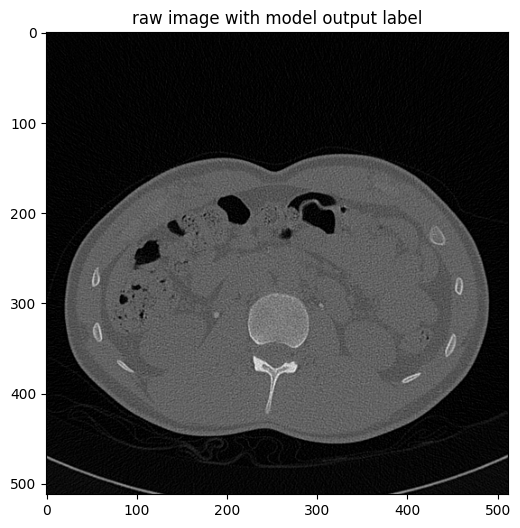

In [13]:

import matplotlib.pyplot as plt
``

plt.figure(figsize=(8,6))
plt.title("raw image with model output label")
plt.imshow(raw_img[2,:,:], cmap='gray')

In [4]:
raw_data_dict.keys()

dict_keys(['EXACT09_CASE01', 'EXACT09_CASE02', 'EXACT09_CASE03', 'EXACT09_CASE04', 'EXACT09_CASE05', 'EXACT09_CASE06', 'EXACT09_CASE07', 'EXACT09_CASE08', 'EXACT09_CASE09', 'EXACT09_CASE10', 'EXACT09_CASE11', 'EXACT09_CASE12', 'EXACT09_CASE13', 'EXACT09_CASE14', 'EXACT09_CASE15', 'EXACT09_CASE16', 'EXACT09_CASE17', 'EXACT09_CASE18', 'EXACT09_CASE19', 'EXACT09_CASE20'])

#### pre crop EXACT09

In [5]:
crop_cube_size=(256,256,256)
stride=(64,64,64)

# -----INPUT-----
output_file_path = "/mnt/wangc/EXACT09/Precrop_dataset_for_EXACT09_256"#在这个文件夹下

if not os.path.exists(output_file_path+"/image/"):
    os.makedirs(output_file_path+"/image/")

if not os.path.exists(output_file_path+"/label/"):
    os.makedirs(output_file_path+"/label/") 

raw_data_dict = EXACT09_data_dict
# -----END-----

for i, case in enumerate(['EXACT09_CASE15']):
    raw_img = io.imread(raw_data_dict[case]["image"], plugin='simpleitk')
    label_img = io.imread(raw_data_dict[case]["label"], plugin='simpleitk')
    # print(type(raw_img),type(label_img))
    raw_img_crop_list = crop_one_3d_img(raw_img, crop_cube_size=crop_cube_size, stride=stride)#用上面那个函数裁剪
    label_img_crop_list = crop_one_3d_img(label_img, crop_cube_size=crop_cube_size, stride=stride)

    for idx in range(len(raw_img_crop_list)):
        print("progress: "+str(idx)+"th crop | "+str(i)+"th 3d img: "+str(case), end="\r")
        
        sitk.WriteImage(sitk.GetImageFromArray(raw_img_crop_list[idx]), output_file_path+"/image/"+case+"_"+str(idx)+".nii.gz")
        sitk.WriteImage(sitk.GetImageFromArray(label_img_crop_list[idx]), output_file_path+"/label/"+case+"_"+str(idx)+".nii.gz")
        
        # np.save(output_file_path+"/image/"+case+"_"+str(idx)+".npy", raw_img_crop_list[idx])#保存
        # np.save(output_file_path+"/label/"+case+"_"+str(idx)+".npy", label_img_crop_list[idx])

KeyboardInterrupt: 

In [ ]:

Precrop_dataset_for_train_path = "/mnt/share102/cs22-wangc/EXACT09/Precrop_dataset_for_EXACT091"
Precrop_dataset_for_train_raw_path = Precrop_dataset_for_train_path+"/image"
raw_case_name_list = os.listdir(Precrop_dataset_for_train_raw_path)

random_index = random.randint(0, len(raw_case_name_list) - 1)
# raw_img_adrr=raw_case_name_list[random_index]
raw_img_adrr=Precrop_dataset_for_train_raw_path = Precrop_dataset_for_train_path+"/image/"+'EXACT09_CASE11_118.nii.gz'
raw_img = io.imread(raw_img_adrr, plugin='simpleitk')
print(raw_img[2,:,:])
# raw_case_name_list

In [40]:
# def show_all_2d_img(raw_img_path,output_folder,img_num=None,slice_index=20):
#     raw_img_list=os.listdir(raw_img_path)
#     img_list=[]
#     num_rows = 4
#     num_cols = 4
#     if img_num is None:
#         img_num=len(raw_img_list)
#         img_num=min(img_num,raw_img_list)
#     for i in img_num:
#         img_addr = Precrop_dataset_for_train_raw_path + "/" + raw_img_list[i]
#         img = io.imread(img_addr, plugin='simpleitk')
#         img_list.append(img)
#         print(f'img_selecting {100 * (i+1) / img_num:.2f}%')
#     # 创建一个包含32个子图的图像窗口
#     fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
#     fig.suptitle("Raw Images")
#     for i in range(num_rows):
#         for j in range(num_cols):
#             index = i * num_cols + j
#             temp=img_list[index]
#             if slice_num < raw_img_crop.shape[0]:
#                 axes[i, j].imshow(temp[slice_num, :, :], cmap='gray')
#                 axes[i, j].set_title(f"img_list index {index}")
#                 axes[i, j].axis('off')  # 不显示坐标轴
#     plt.savefig(os.path.join(out_put_folder, "output_images.png"))

SyntaxError: non-default argument follows default argument (3842804468.py, line 1)

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage import io

def show_all_2d_img(raw_img_path, output_folder, img_num=None, num_images_per_batch=16, slice_index=20):
    raw_img_list = os.listdir(raw_img_path)
    if img_num is None:
        img_num = len(raw_img_list)
    img_num = min(img_num, len(raw_img_list))
    num_batches = (img_num + num_images_per_batch - 1) // num_images_per_batch  # 上取整

    num_rows = 4
    num_cols = 4
    
    
    for batch_num in range(num_batches):
        start_index = batch_num * num_images_per_batch
        end_index = min((batch_num + 1) * num_images_per_batch, img_num)
        
        img_list = []
        for i in range(start_index, end_index):
            img_addr = os.path.join(raw_img_path, raw_img_list[i])
            img = io.imread(img_addr, plugin='simpleitk')
            img_list.append(img)
            print(f'img_selecting {100 * (i+1) / img_num:.2f}%')

        # 创建一个包含16个子图的图像窗口
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
        fig.suptitle(f"Batch {batch_num+1} - Raw Images")
        
        for i in range(num_rows):
            for j in range(num_cols):
                index = i * num_cols + j
                if index < len(img_list):
                    temp = img_list[index]
                    axes[i, j].imshow(temp[slice_index, :, :], cmap='gray')
                    axes[i, j].set_title(f"img_list index {index}")
                    axes[i, j].axis('off')  # 不显示坐标轴
        
        # 调整子图之间的间距和布局
        plt.subplots_adjust(wspace=0.1, hspace=0.3)
        
        # 保存图像
        plt.savefig(os.path.join(output_folder, f"output_images_batch_{batch_num+1}.png"))
        
        # 关闭图像窗口，避免重叠
        plt.close()



In [2]:
import subprocess
import time
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
from torch import from_numpy as from_numpy
from matplotlib import gridspec



#使用示例 show_all_2d_img_with_labels(raw_img_folder,slice_folder,img_num=2000,label_path=label_path)
def show_all_2d_img_with_labels(raw_img_path, output_folder, img_num=None, 
                                num_images_per_batch=16, slice_index=20, label_path=None,raw_img_list=None):
    if raw_img_list is None:
        raw_img_list = os.listdir(raw_img_path)
    if img_num is None:
        img_num = len(raw_img_list)
    img_num = min(img_num, len(raw_img_list))
    num_batches = (img_num + num_images_per_batch - 1) // num_images_per_batch  # 上取整

    num_rows = 4
    num_cols = 4
    
    # 检查并创建输出文件夹
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for batch_num in range(num_batches):
        start_index = batch_num * num_images_per_batch
        end_index = min((batch_num + 1) * num_images_per_batch, img_num)
        
        img_list = []
        label_list = []  # 新增：用于存储标签图像

        img_names=[]
        label_names=[]
        
        for i in range(start_index, end_index):
            raw_img_addr = os.path.join(raw_img_path, raw_img_list[i])
            raw_img = io.imread(raw_img_addr, plugin='simpleitk')
            img_list.append(raw_img)

            img_names.append(raw_img_list[i])
            
            if label_path is not None:
                if raw_img_list is None:
                    label_img_list = os.listdir(label_path)
                else:
                    label_img_list=raw_img_list
                label_img_addr = os.path.join(label_path, label_img_list[i])  # 使用相同的索引加载标签图像
                label_img = io.imread(label_img_addr, plugin='simpleitk')
                label_list.append(label_img)  # 存储标签图像

                label_names.append(label_img_list[i])
        
        # 创建一个包含16个子图的图像窗口，使用gridspec布局
        fig = plt.figure(figsize=(20, 20))
        gs = gridspec.GridSpec(num_rows, num_cols, figure=fig)
        fig.suptitle(f"Batch {batch_num+1} - Raw Images")
        for i in range(num_rows):
            for j in range(num_cols):
                index = i * num_cols + j
                if index < len(img_list):
                    raw_img = img_list[index]
                    ax = fig.add_subplot(gs[i, j])
                    if label_path is not None:
                        label_img = label_list[index]  # 使用相应索引的标签图像
                        if 1 not in label_img[slice_index, :, :]:
                            j=0
                            while(j<label_img.shape[0] and 1 not in label_img[j, :, :]):
                                j+=1
                            if j<label_img.shape[0]:
                                ax.imshow(raw_img[j, :, :], cmap='gray')
                                ax.contour(label_img[j, :, :], colors='r', linestyles='-')
                            else:
                                ax.imshow(raw_img[0, :, :], cmap='gray')
                                ax.contour(label_img[0, :, :], colors='r', linestyles='-')
                                ax.text(1, 1, 'No Label', color='blue', fontsize=16, ha='right', va='top', transform=ax.transAxes)
                        else:
                            ax.imshow(raw_img[slice_index, :, :], cmap='gray')
                            ax.contour(label_img[j, :, :], colors='r', linestyles='-')
                    else:
                        ax.imshow(raw_img[slice_index, :, :], cmap='gray')
                    ax.set_title(f"Image {img_names[index]}\nLabel {label_names[index]} ")
                    ax.axis('off')
               
        # 调整子图之间的间距和布局
        plt.tight_layout()
        
        # 保存图像
        plt.savefig(os.path.join(output_folder, f"exact09_cluster_{batch_num+1}.png"))
        
        # 关闭图像窗口，避免重叠
        plt.close()

In [ ]:
show_all_2d_img_with_labels(raw_img_path, output_folder, img_num=None, 
                                num_images_per_batch=16, slice_index=20, label_path=None,raw_img_list=None)